# Analysis of the Iris Data Set
***

Author: Irene Kilgannon

## Background to Fisher's Iris Data Set

In 1928 Edgar Anderson published his paper entitled ['The Problem of Species in the Northern Blue Flags, _Iris versicolor_ and _Iris virginica_'](https://www.biodiversitylibrary.org/page/15997721). Anderson was a evolutionary biologist interested in answering two questions namely, what are species and how have they originated? Between 1923 and 1928 he and his team studied _Iris versicolor_, at a number of different sites from Ontario in Canada to Alabama in the United States, by measuring a number of different iris characteristics. Surprisingly his study found that there were actually two different iris species present, _Iris versicolor_ and _Iris virginia_ and that it was possible to differentiate between them by geographic location. 

The data set is commonly known as Fisher's Iris Data set after the statistician and biologist, Ronald Fisher. The data measurements for _Isis setosa_ and _Iris versicolor_ were collected by Anderson from the same colony of plants in the Gaspé Peninsula, Quebec in 1935. According to [Unwin and Kleinman](https://www.jstor.org/stable/4331526?seq=13) the _Iris virginica_ data samples were from Anderson's original research and were collected in Camden, Tennessee. Fisher collated and analysed the data and in 1936 published his results in the Annals of Eugenics [The Use of Multiple Measurements in Taxonomic Problems](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x). He used a statistical method, linear discriminant analysis to attempt to distinguish the different iris species from each other. He found that _Iris setosa_ was easily distinguishable from the other two iris species using this method. 

Fisher's data set can be seen in his published paper but, in our computer age, the data set is available to download at [UCI Maching Learning Repository](https://archive.ics.uci.edu/dataset/53/iris). The data set is very widely used with currently over 700,000 views of the data set on the UCI website.

## Import the required modules

In [1]:
# Load the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data set

In [5]:
# Load the data set
iris = pd.read_csv("iris_data.csv", header = None)

## Explore the Data Set

In [6]:
# Overview of the data set
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The quick overview of the data set reveals that there are no column names in the imported csv file.

The column names were obtained from the variables table on the [information page of the iris data set](https://archive.ics.uci.edu/dataset/53/iris). They are sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm and species.

Initally Problem loosing 1 row of data doing it this way. it is converting the data in row 0 to the column names direcly. need to add the column names above the row. Fixed the problem using the argument [header = None](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html) when reading in the csv file. 

In [7]:
# Add column names
iris.columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'species']
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## The Variables in the Data Set

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
species            0
dtype: int64

In [10]:
# Summary statistics of the data set
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.groupby('species').describe()

sepal_length_cm                                              \
                          count   mean       std  min    25%  50%  75%  max   
species                                                                       
Iris-setosa                50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor            50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica             50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width_cm         ... petal_length_cm       \
                         count   mean  ...             75%  max   
species                                ...                        
Iris-setosa               50.0  3.418  ...           1.575  1.9   
Iris-versicolor           50.0  2.770  ...           4.600  5.1   
Iris-virginica            50.0  2.974  ...           5.875  6.9   

                petal_width_cm                                            
                         count   mean       std  min  25%  50%  75%  max  
species                                                                   
Iris-setosa               50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor           50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica            50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [14]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
setosa = iris[iris['species'] == 'Iris-setosa']
setosa.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


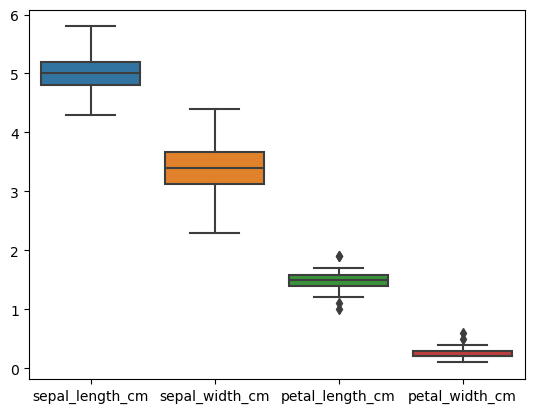

In [ ]:
#Box plot of above, add titles

sns.boxplot(setosa)
plt.show()

In [ ]:
versicolor = iris[iris['species'] == 'Iris-versicolor']
versicolor.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


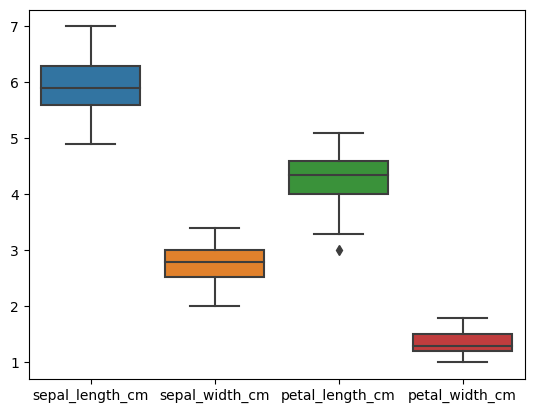

In [ ]:
sns.boxplot(versicolor)
plt.show()

In [ ]:
virginica = iris[iris['species'] == 'Iris-virginica']
virginica.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


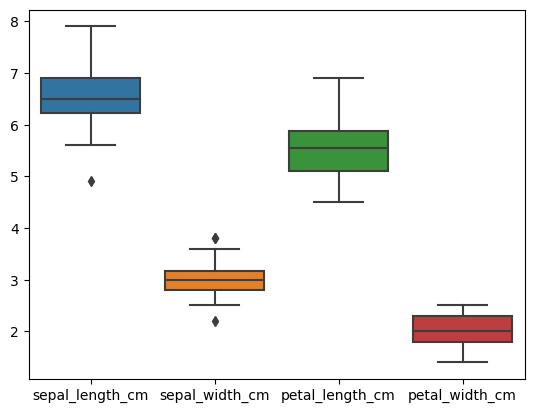

In [ ]:
sns.boxplot(virginica)
plt.show()

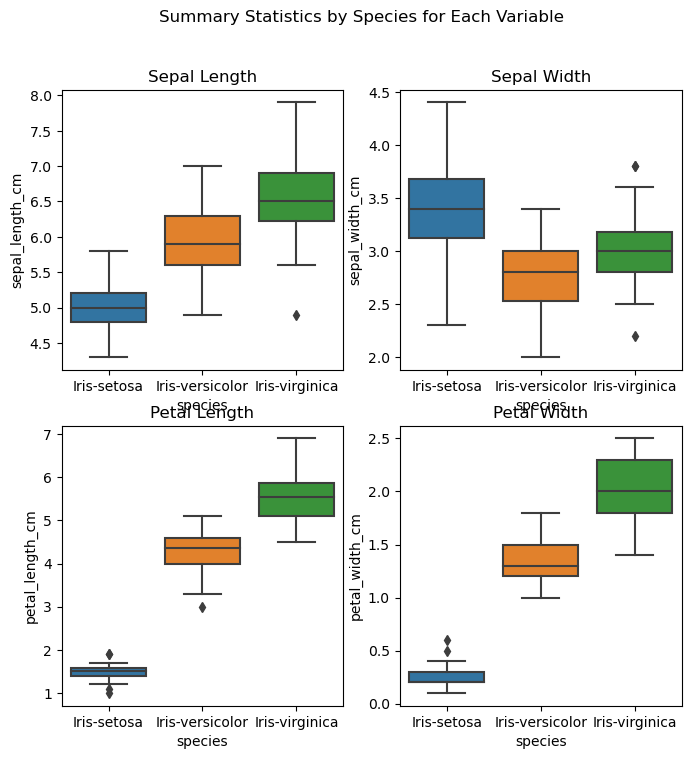

In [ ]:
## Trying to compare across the three species. Looks squashed. 

fig, axes = plt.subplots(2,2, figsize = (8, 8))
sns.boxplot(ax = axes[0, 0], x = 'species', y = 'sepal_length_cm', data = iris)
sns.boxplot(ax = axes[0, 1], x = iris['species'], y= iris['sepal_width_cm'])
sns.boxplot(ax = axes[1, 0], x = iris['species'], y = iris['petal_length_cm'])
sns.boxplot(ax = axes[1, 1], x = iris['species'], y = iris['petal_width_cm'])
plt.suptitle('Summary Statistics by Species for Each Variable')
axes[0,0].set_title('Sepal Length')
axes[0,1].set_title('Sepal Width')
axes[1,0].set_title('Petal Length')
axes[1,1].set_title('Petal Width')
plt.savefig('Boxplot.png')
plt.show()

__Summary of the Data Set__

It is a small data set with 150 rows and five columns with each row corresponding to a different flower sample. There are three different iris species, _Iris setosa_, _Iris versicolor_ and _Iris virginica_ with 50 samples for each species. There is no data missing from any of the columns.


![iris](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*YYiQed4kj_EZ2qfg_imDWA.png)

Four measurements (or variables) were taken for each flower examined:
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

Each iris has three true petals and three sepals. The three petals are upright and are also know as standards. Sepals are a modified leaf and are sometimes called falls. Sepals are usually green in colour and its function is to protect the developing flower bud. When the flower has bloomed the iris' sepal is described as "the landing pad for bumblebees" by the [US Forest Service](https://www.fs.usda.gov/wildflowers/beauty/iris/flower.shtml). This diagram from nicely illustrates the petals and the sepals.

## Histogram of each variable

A histogram of each variable must be saved to a png file.

TO DO
overall hist
breakdown by species. 

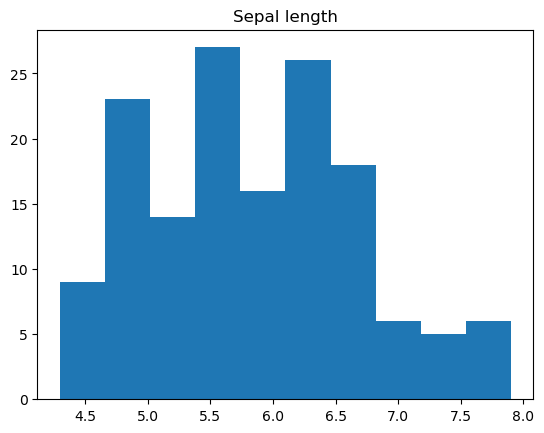

In [ ]:
plt.hist(iris['sepal_length_cm'])
plt.title('Sepal length')
plt.show()

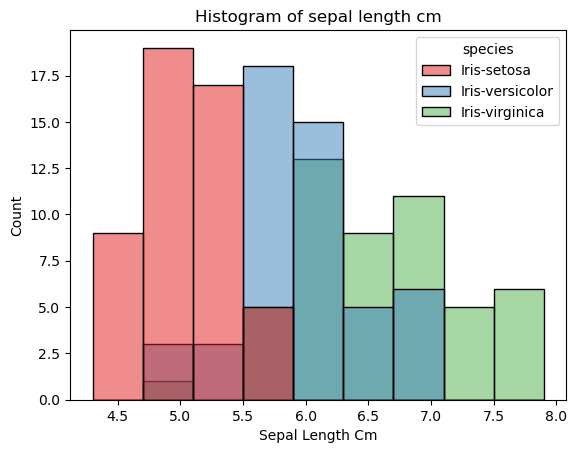

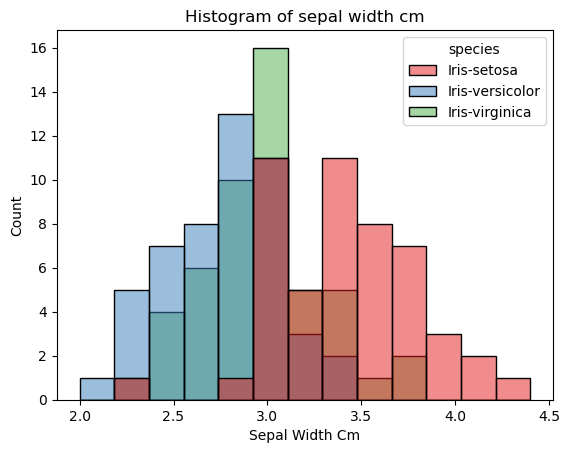

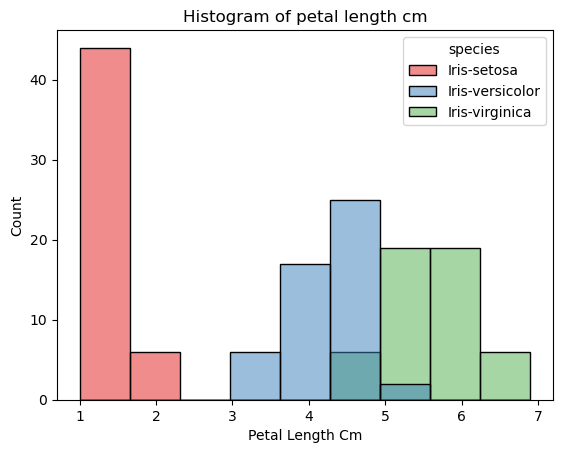

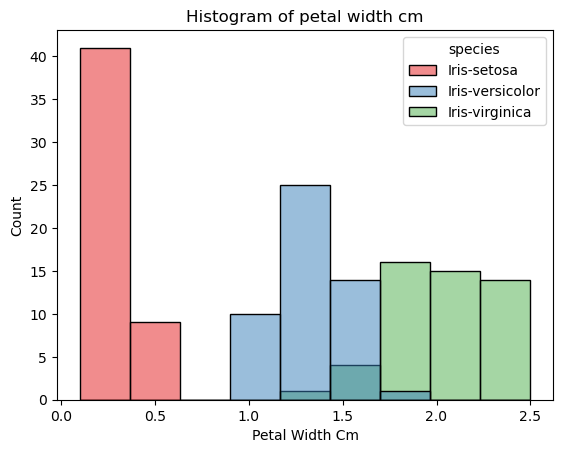

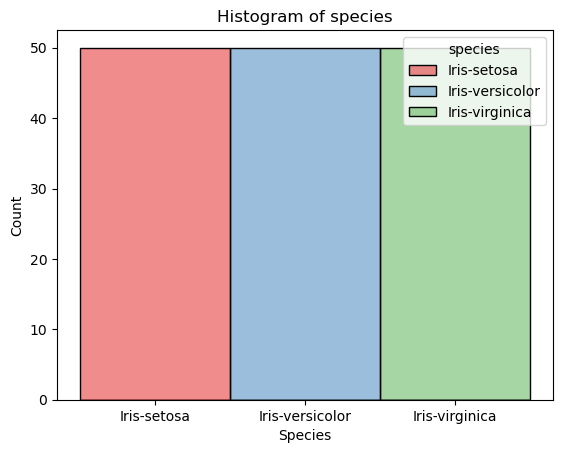

In [ ]:
for col in iris:
    sns.set_palette("Set1")
    sns.histplot(x = col, data = iris, hue = 'species')
    plt.title(f"Histogram of {col.replace('_', ' ')}")
    plt.xlabel(f"{col.replace('_', ' ').title()}")
    #plt.savefig(f'{col}.png')
    plt.show()

## Scatter plot of each pair of variables. 

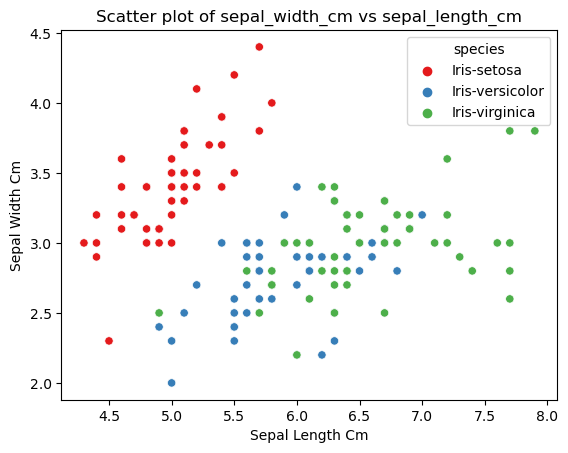

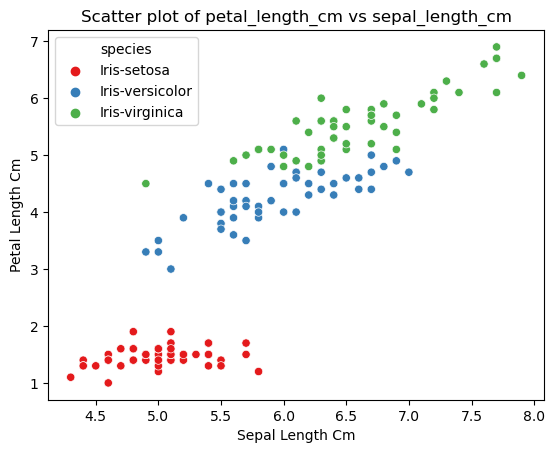

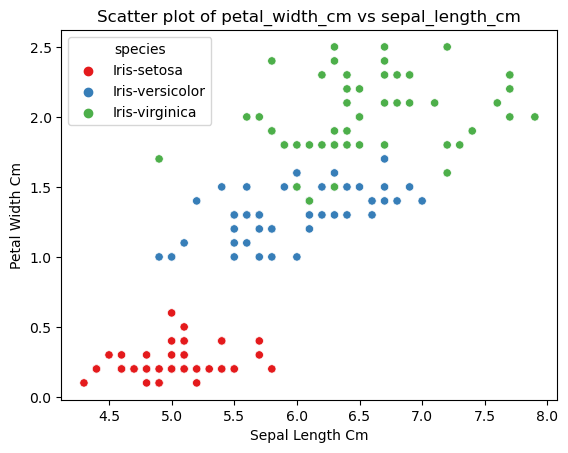

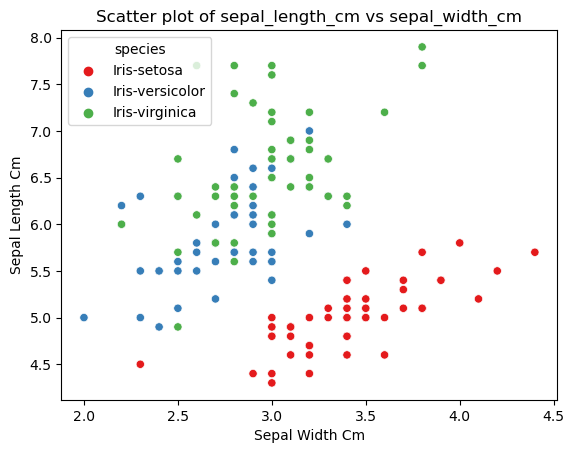

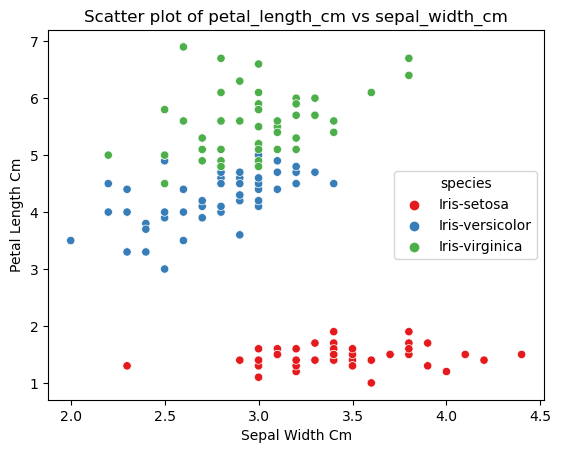

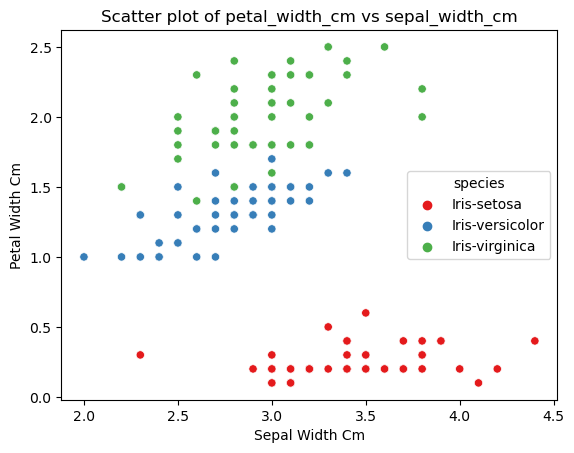

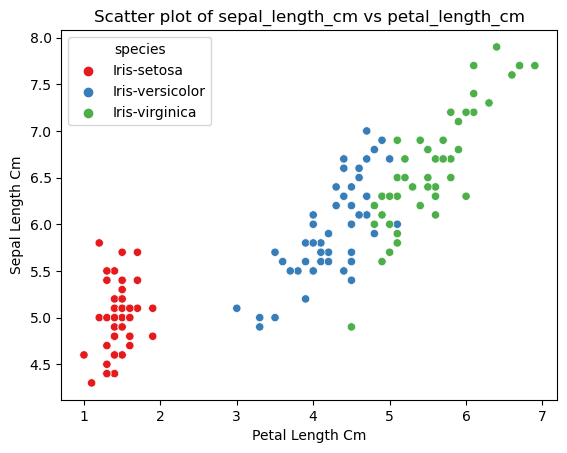

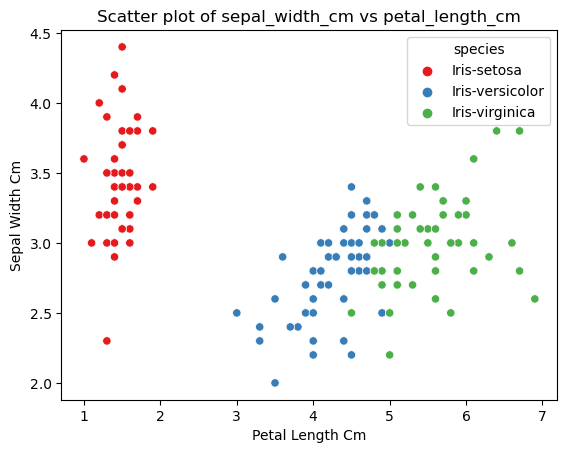

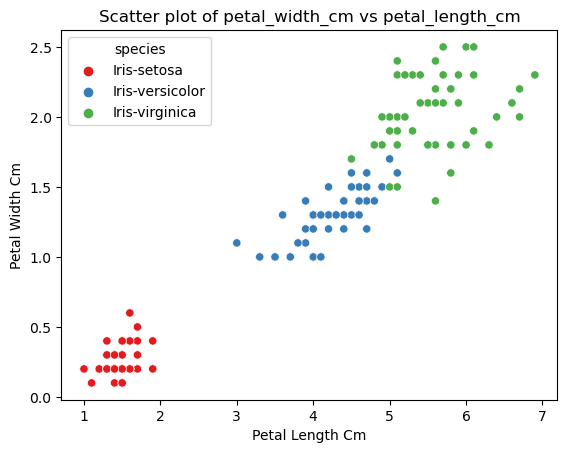

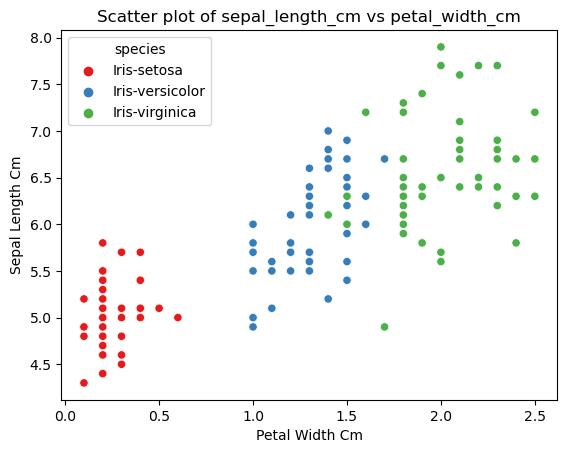

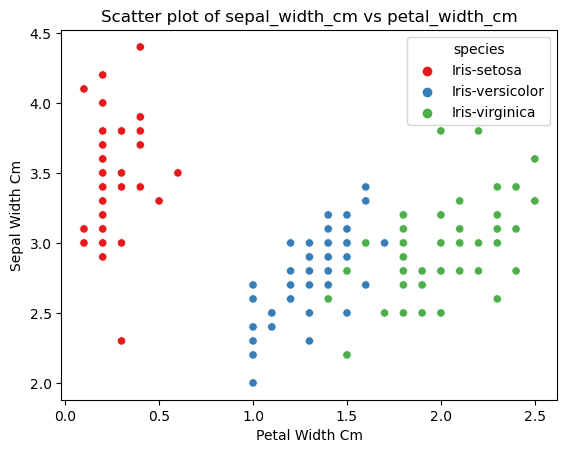

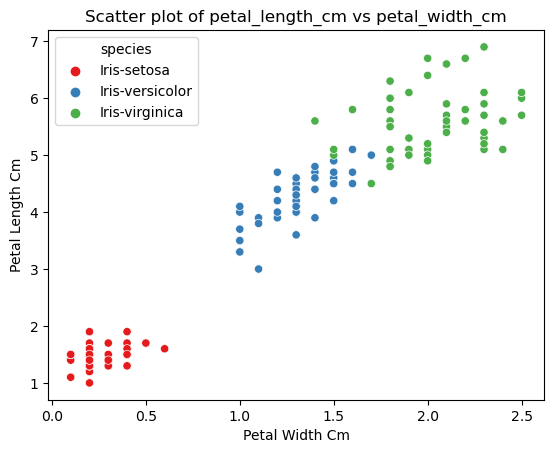

In [ ]:
for col1 in iris:
    for col2 in iris:
        if col1 == col2 or col1 == 'species' or col2 == 'species':
            continue
        else:
            sns.scatterplot(data = iris, x = col1, y = col2, hue = 'species')
            plt.title(f"Scatter plot of {col2} vs {col1}")
            plt.xlabel(f"{col1.title().replace('_', ' ')}")
            plt.ylabel(f"{col2.title().replace('_', ' ')}")
            plt.show()

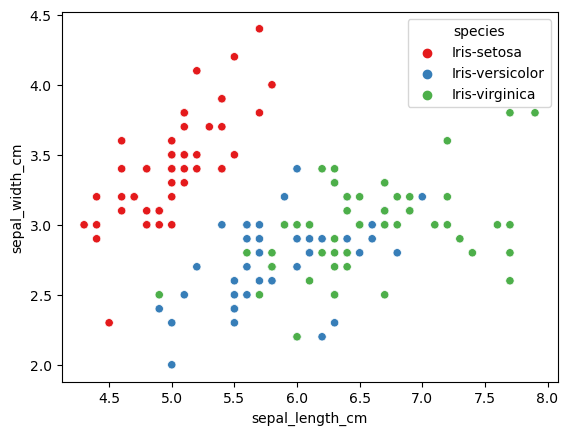

In [ ]:
sns.scatterplot(data = iris, x = 'sepal_length_cm', y = 'sepal_width_cm', hue = 'species')
plt.show()

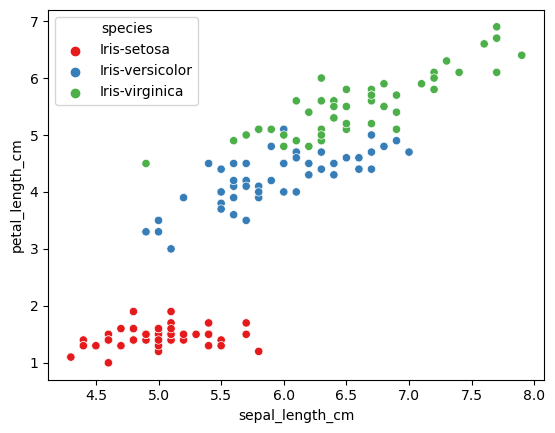

In [ ]:
sns.scatterplot(data = iris, x = 'sepal_length_cm', y = 'petal_length_cm', hue = 'species')
plt.show()

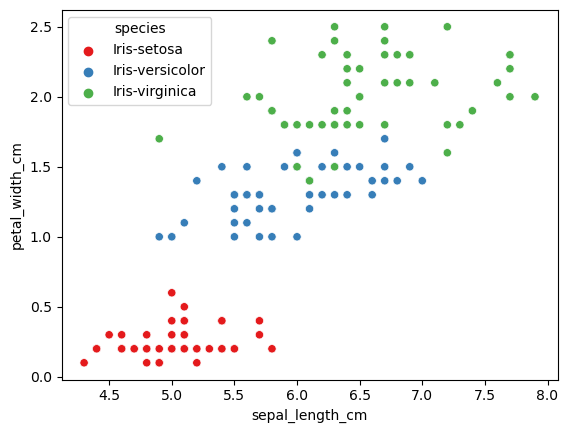

In [ ]:
sns.scatterplot(data = iris, x = 'sepal_length_cm', y = 'petal_width_cm', hue = 'species')
plt.show()

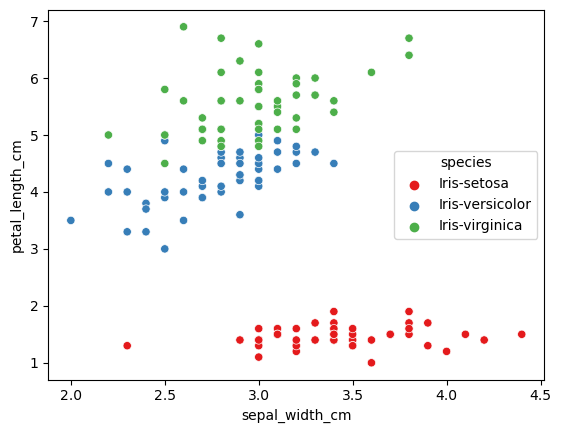

In [ ]:
sns.scatterplot(data = iris, x = 'sepal_width_cm', y = 'petal_length_cm', hue = 'species')
plt.show()

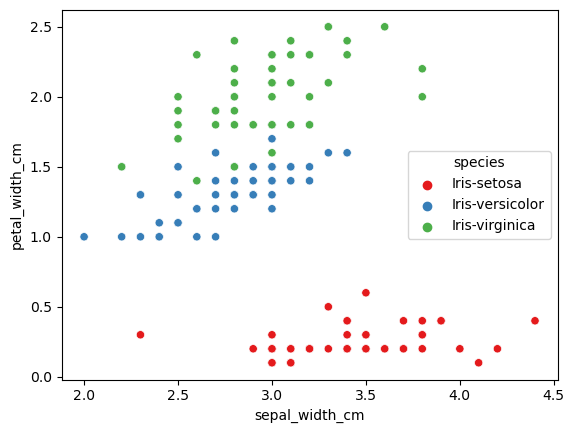

In [ ]:
sns.scatterplot(data = iris, x = 'sepal_width_cm', y = 'petal_width_cm', hue = 'species')
plt.show()

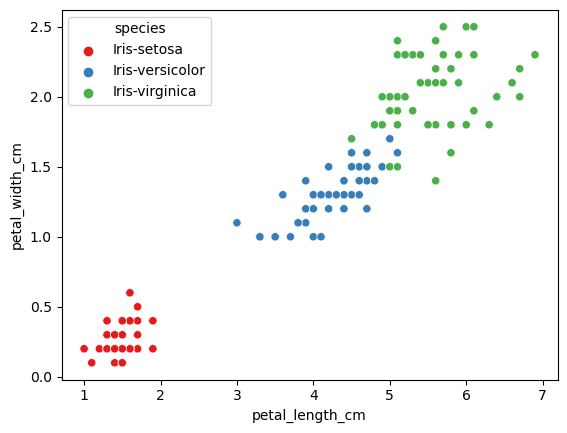

In [ ]:
sns.scatterplot(data = iris, x = 'petal_length_cm', y = 'petal_width_cm', hue = 'species')
plt.show()

Pairplots

https://www.geeksforgeeks.org/python-seaborn-pairplot-method/

c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


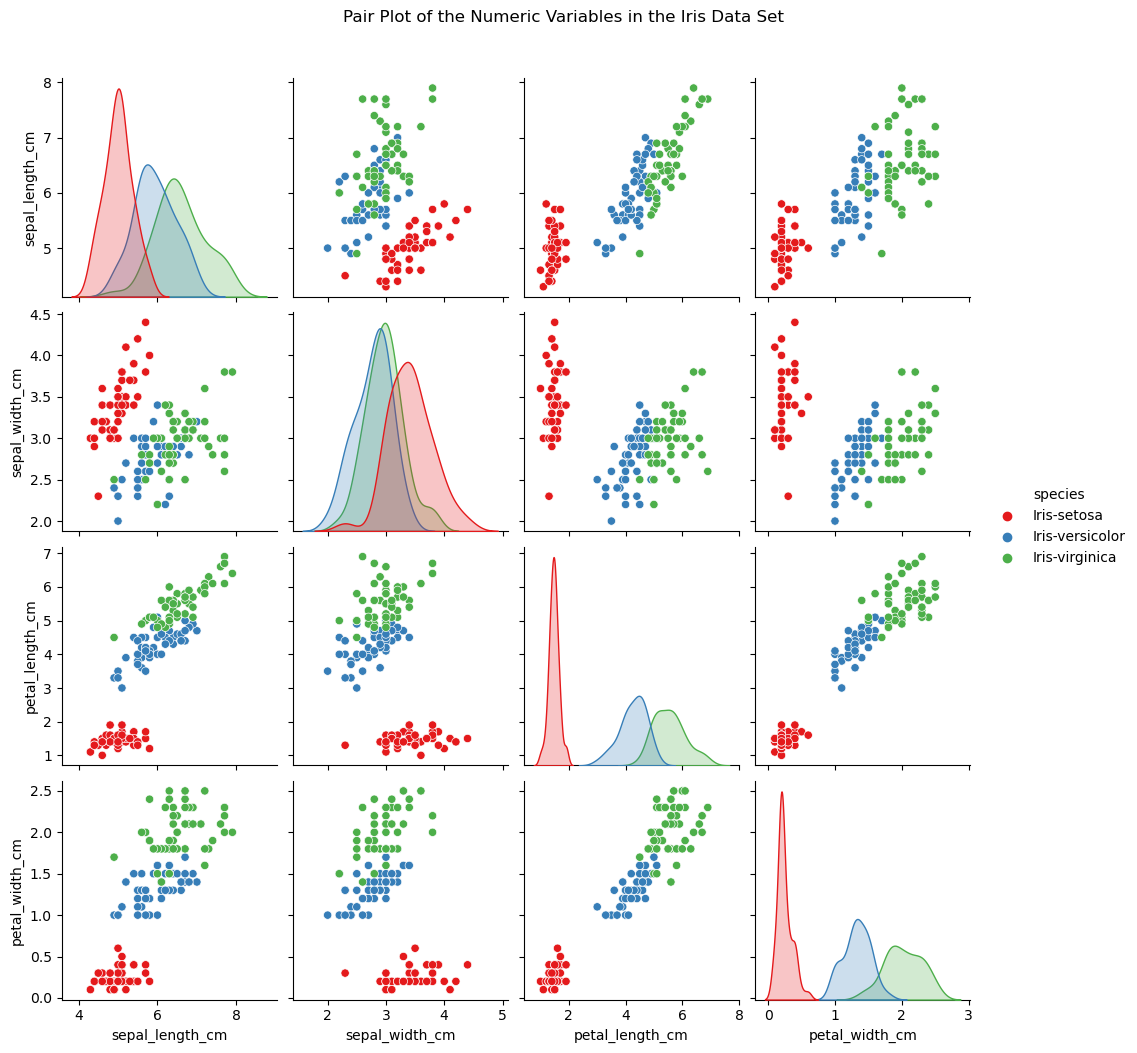

In [ ]:
sns.pairplot(iris, hue = 'species')
plt.suptitle('Pair Plot of the Numeric Variables in the Iris Data Set', y = 1.05)
plt.show()

In [ ]:
# regression lines

sns.lmplot(iris, x = 'Sepal Length (cm)', y = 'Sepal Width (cm)', ci = None, hue = 'Species')

# Adding title, x and y labels to the plot.
plt.title('')
plt.xlabel('Sepal Length (cm)(cm)')
plt.ylabel('Sepal Width (cm)')

# Display the plot
plt.show()

KeyError: "None of [Index(['Sepal Length (cm)', 'Sepal Width (cm)', 'Species'], dtype='object')] are in the [columns]"

## Correlation diagrams

Any other analysis , heatmaps

In [ ]:
iris.drop(['species'], axis = 1).corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.109369,0.871754,0.817954
sepal_width_cm,-0.109369,1.000000,-0.420516,-0.356544
petal_length_cm,0.871754,-0.420516,1.000000,0.962757
petal_width_cm,0.817954,-0.356544,0.962757,1.000000


heatmap by flower species

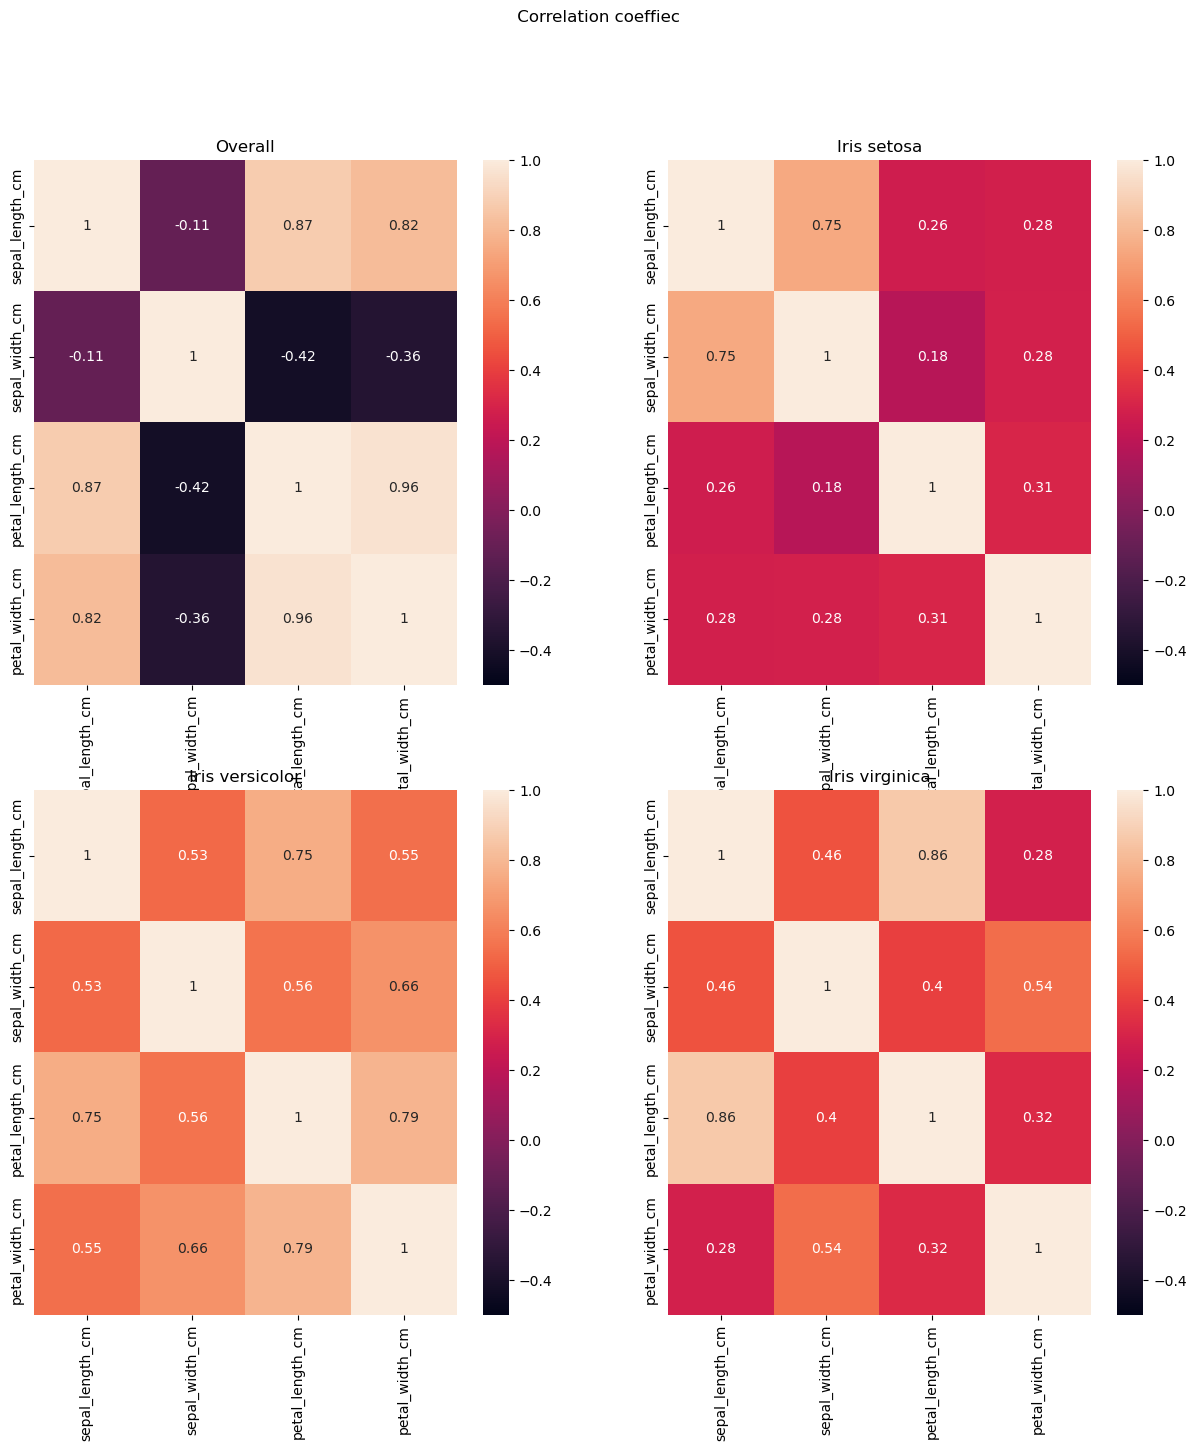

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15, 15))

sns.heatmap(iris.drop(['species'], axis = 1).corr(), annot = True, ax = ax[0, 0], vmin = -0.5, vmax=1)
ax[0,0].set_title('Overall')

sns.heatmap(setosa.drop(['species'], axis = 1).corr(), annot = True, ax = ax[0, 1], vmin = -0.5, vmax=1)
ax[0,1].set_title('Iris setosa')
sns.heatmap(versicolor.drop(['species'], axis = 1).corr(), annot = True, ax = ax[1, 0], vmin = -0.5, vmax=1)
ax[1,0].set_title('Iris versicolor')
sns.heatmap(virginica.drop(['species'], axis = 1).corr(), annot = True, ax = ax[1,1], vmin = -0.5, vmax=1)
ax[1,1].set_title('Iris virginica')

#ax.set_xticklabels(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], rotation=45)

plt.suptitle(' Correlation coeffiec')
#plt.savefig('Heatmap of the Correlation Coefficients')
plt.show()


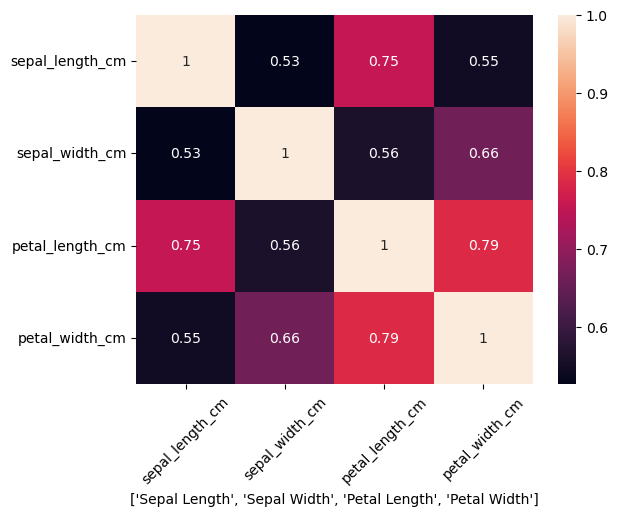

In [ ]:
sns.heatmap(versicolor.drop(['species'], axis = 1).corr(), annot = True)

plt.xticks(rotation = 45)
plt.show()

<Axes: >

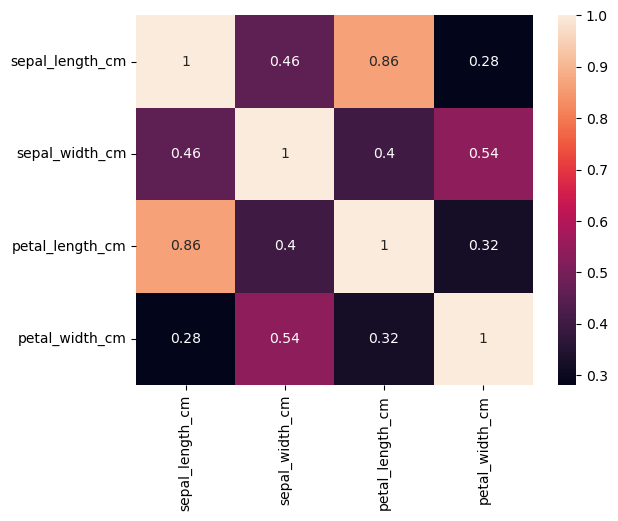

In [ ]:
sns.heatmap(virginica.drop(['species'], axis = 1).corr(), annot = True)

In [ ]:
from statsmodels.formula.api import ols

mdl_sepal_length_vs_petal_length = ols("sepal_length_cm ~ petal_length_cm", data = setosa).fit()

print(mdl_sepal_length_vs_petal_length.params)

Intercept          4.221204
petal_length_cm    0.536063
dtype: float64


In [ ]:
explanatory_data = pd.DataFrame({"petal_length_cm": np.arange(1.0, 3.0)})

setosa_sepal_length = mdl_sepal_length_vs_petal_length.predict(explanatory_data)
prediction_data = explanatory_data.assign(setosa_sepal_length = setosa_sepal_length)
print(prediction_data)

   petal_length_cm  setosa_sepal_length
0              1.0             4.757267
1              2.0             5.293330


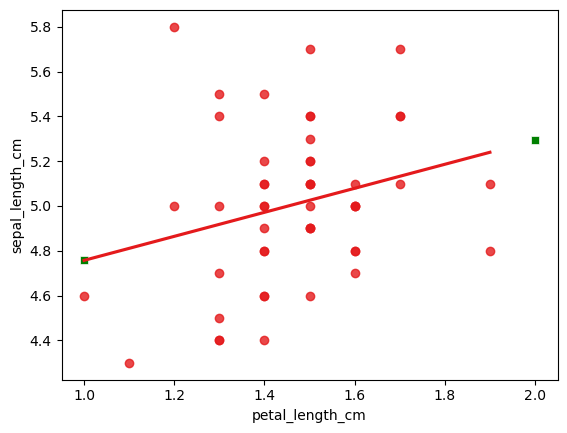

In [ ]:
fig = plt.figure()

sns.regplot(setosa, x = 'petal_length_cm', y = 'sepal_length_cm', ci = None)

sns.scatterplot(prediction_data, x = 'petal_length_cm', y = 'setosa_sepal_length', color = 'g', marker = 's')

plt.show()


In [ ]:
print(mdl_sepal_length_vs_petal_length.resid)

0     0.128308
1    -0.071692
2    -0.218086
3    -0.425298
4     0.028308
5     0.267489
6    -0.371692
7    -0.025298
8    -0.571692
9    -0.125298
10    0.374702
11   -0.278905
12   -0.171692
13   -0.510873
14    0.935521
15    0.674702
16    0.481914
17    0.128308
18    0.567489
19    0.074702
20    0.267489
21    0.074702
22   -0.157267
23   -0.032511
24   -0.439723
25   -0.078905
26   -0.078905
27    0.174702
28    0.228308
29   -0.378905
30   -0.278905
31    0.374702
32    0.174702
33    0.528308
34   -0.125298
35    0.135521
36    0.581914
37   -0.125298
38   -0.518086
39    0.074702
40    0.081914
41   -0.418086
42   -0.518086
43   -0.078905
44   -0.139723
45   -0.171692
46    0.021095
47   -0.371692
48    0.274702
49    0.028308
dtype: float64


In [ ]:
mdl_sepal_length_vs_petal_length.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        sepal_length_cm   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.592
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0641
Time:                        21:47:26   Log-Likelihood:                -16.501
No. Observations:                  50   AIC:                             37.00
Df Residuals:                      48   BIC:                             40.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.2212      0.417     10.125      0.000       3.383       5.059
petal_length_cm     0.5361      0.283      1.895      0.064      -0.033       1.105
==============================================================================
Omnibus:                        2.210   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.833
Skew:                           0.468   Prob(JB):                        0.400
Kurtosis:                       2.931   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
coeffs = mdl_sepal_length_vs_petal_length.params

intercept = coeffs[0]
slope = coeffs[1]

sepal_length_cm_1 = intercept + slope * explanatory_data
print(sepal_length_cm_1)

print(sepal_length_cm_1.assign(predictions_auto = mdl_sepal_length_vs_petal_length.predict(explanatory_data)))


   petal_length_cm
0         4.757267
1         5.293330
   petal_length_cm  predictions_auto
0         4.757267          4.757267
1         5.293330          5.293330


Linear regression references and research

the basics https://archive.is/VDeY2

https://archive.is/QioLp

https://archive.is/M1JG5

## References

https://www.geeksforgeeks.org/ways-to-save-python-terminal-output-to-a-text-file/

[Iris Data Set](https://archive.ics.uci.edu/dataset/53/iris)


*** 
## END